# Introduction to Spatial Data Science and Machine Learning

### Overview
Welcome to the Introduction to Spatial Data Science and Machine Learning workshop for UCL's Urban Design B-Pro programme 2022/2023.

These workshops will provide a broad introduction to spatial data science and machine learning with Python.

## 02. Visualisation
This workshop covers an intro to data visualisation, focusing on spatial data visualisation, utilising Python. It will demonstrate a number of mapping techniques such as choropleth maps and dot density maps.

In [1]:
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import geopandas as gpd
import seaborn as sns
import pandas as pd
import folium
import numpy as np
import pysal
import mapclassify
import contextily as ctx
%matplotlib inline

/Users/liambolton/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [356]:
# Load dataset of the dwellings per hectare of London boroughs downloaded from the London Datastore: https://data.london.gov.uk/dataset/number-and-density-of-dwellings-by-borough?q=number%20and%20de
london_dph_density = gpd.read_file("https://github.com/lbuk/UD_Intro_SDSML2022/blob/master/02_visualisation/data/gl_borough_dph.geojson?raw=true")

In [319]:
# Print the geometry type
type(london_dph_density.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

In [320]:
# Dataset info
london_dph_density.info

<bound method DataFrame.info of                    borough   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  \
0     Barking and Dagenham  E09000002   3779.934     169.150         F   
1                   Barnet  E09000003   8674.837       0.000         F   
2                   Bexley  E09000004   6428.649     370.619         F   
3                    Brent  E09000005   4323.270       0.000         F   
4                  Bromley  E09000006  15013.487       0.000         F   
5                   Camden  E09000007   2178.932       0.000         T   
6           City of London  E09000001    314.942      24.546         T   
7                  Croydon  E09000008   8649.441       0.000         F   
8                   Ealing  E09000009   5554.428       0.000         F   
9                  Enfield  E09000010   8220.025       0.000         F   
10               Greenwich  E09000011   5044.190     310.785         F   
11                 Hackney  E09000012   1904.902       0.000         T   
12  Ha

### Data Exploration

In [321]:
# Summary statistics from the dph_2012 variable
london_dph_density["dph_2012"].describe()

count    33.000000
mean     29.045455
std      16.974486
min       8.700000
25%      17.200000
50%      21.600000
75%      41.600000
max      68.600000
Name: dph_2012, dtype: float64

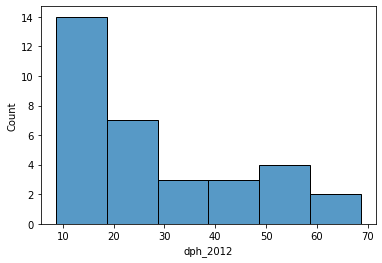

In [322]:
# Basic histogram of dwellings per hectare in 2012
sns.histplot(london_dph_density["dph_2012"], bins=6)

plt.show() # Plot the maps

/Users/liambolton/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


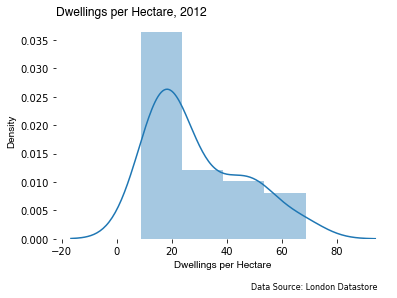

In [412]:
# Histogram and KDE chart of dwellings per hectare in 2012
# We can customise the chart
fig = plt.figure() # Produce figure
ax = sns.distplot(london_dph_density["dph_2012"]) # Produce axis and histogram and KDE chart

font_axes = {'family':'helvetica','color':'black','size':10} # Axes font
plt.xlabel('Dwellings per Hectare',  fontdict = font_axes) # x-axis label
plt.ylabel('Density',  fontdict = font_axes) # y-axis label

font_title = {'family':'helvetica','color':'black','size':12} # Title font
plt.title('Dwellings per Hectare, 2012', fontdict = font_title, loc = "left") # Chart title

plt.annotate('Data Source: London Datastore', (0,0), (195,-50), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points') # Annotate with data source

ax.set(frame_on=False) # Delete frame

plt.show()

/Users/liambolton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


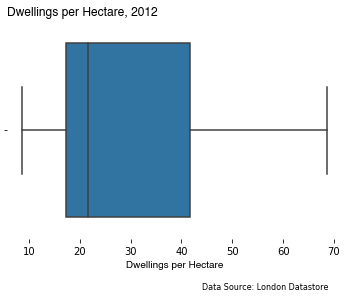

In [411]:
# Box plot of dwellings per hectare in 2012
fig = plt.figure() # Produce figure
ax = sns.boxplot(london_dph_density["dph_2012"]) # Produce axis and box plot

font_title = {'family':'helvetica','color':'black','size':12}
plt.title('Dwellings per Hectare, 2012', fontdict = font_title, loc = "left") # Chart title

font_axes = {'family':'helvetica','color':'black','size':10}
plt.xlabel('Dwellings per Hectare', fontdict = font_axes) # X-axis label

plt.annotate('Data Source: London Datastore', (0,0), (195,-50), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points') # Annotate with data source

ax.set(frame_on=False) # Delete frame

plt.show()

### Coordinate Reference Systems
Coordinate Reference Systems are frameworks for measuring geographic entities on the Earth's surface. Coordinate Reference Systems are utilised as a basis for representing the three-dimensional world on two-dimensional surfaces.

In [325]:
# Print the coordinate reference system
print(london_dph_density.crs)

epsg:4326


In [357]:
# Reproject the coordinate reference system to BNG
london_dph_density.crs = 'epsg:27700'

In [327]:
# Print the reprojected coordinate reference syst
print(london_dph_density.crs)

epsg:27700


<AxesSubplot: >

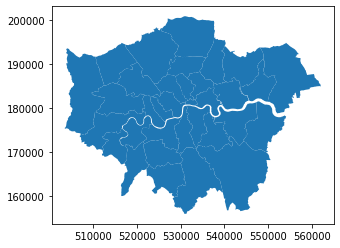

In [328]:
# Simple plot of borough polygons
london_dph_density.plot()

### Classification Systems
Thematic maps such as choropleth maps utilise [classification systems](https://www.axismaps.com/guide/data-classification) to group datasets. There are range of classification systems. Here we focus on equal interval, quantiles and custom classification systems.

In [329]:
np.random.seed(1000000000)

In [330]:
# Equal Intervals classification scheme based on dwellings per hectare in 2012
# Note: equal intervals divides the data into equal sizes
mapclassify.EqualInterval(london_dph_density["dph_2012"], k=5)

EqualInterval         

   Interval      Count
----------------------
[ 8.70, 20.68] |    15
(20.68, 32.66] |     6
(32.66, 44.64] |     4
(44.64, 56.62] |     6
(56.62, 68.60] |     2

In [331]:
# Quantiles classification scheme based on dwellings per hectare in 2012
# Note: quantiles produce breaks with an equal number of data points
mapclassify.Quantiles(london_dph_density["dph_2012"], k=5)

Quantiles             

   Interval      Count
----------------------
[ 8.70, 16.66] |     7
(16.66, 18.24] |     6
(18.24, 26.28] |     7
(26.28, 47.38] |     6
(47.38, 68.60] |     7

In [332]:
# Custom or manual classification scheme based on dwellings per hectare in 2012
mapclassify.UserDefined(london_dph_density["dph_2012"], [20, 40, 60, 80])

UserDefined           

   Interval      Count
----------------------
[ 8.70, 20.00] |    15
(20.00, 40.00] |     9
(40.00, 60.00] |     7
(60.00, 80.00] |     2

### Mapping
Thematic mapping involves mapping across themes. Thematic mapping techniques include choropleth maps, dot density maps, proportional symbol maps, cartograms and so on. In this workshop we will be producing choropleth maps and dot density maps.

#### Choropleth Maps
Choropleth maps are one of the most popular forms of thematic map. Choropleth maps visualise aggregated data within regions such as boroughs or states. The regions are typically shaded according to a specified classification system. Choropleth maps have histocially been utilised to great effect to visualise population, economic and urban statistics.

<Figure size 432x288 with 0 Axes>

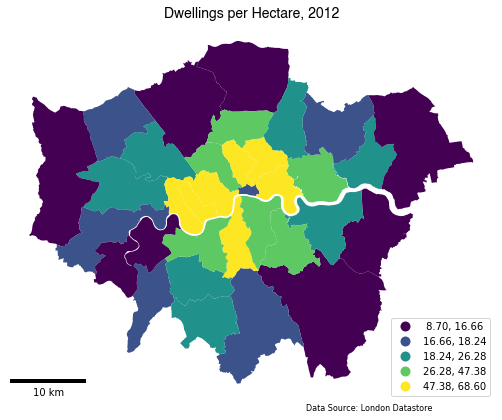

In [413]:
# Choropleth map of dwellings per hectare in London boroughs in 2012
fig = plt.figure() # Produce figure
ax = london_dph_density.plot(column="dph_2012", # Variable
                             figsize=(8.75, 8.75), # Map size
                             scheme="Quantiles", # Classification system
                             cmap="viridis", # Palette
                             legend=True, # Add a legend
                             legend_kwds={"loc": "lower right"}) # Location of legend

font_title = {'family':'helvetica','color':'black','size':14} # Title font
plt.title('Dwellings per Hectare, 2012', fontdict=font_title) # Title

plt.annotate('Data Source: London Datastore', (0,0), (299,-10), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points') # Annotate with data source

ax.set_axis_off() # Delete axes of map

ax.add_artist(ScaleBar(1, location='lower left')) # Scale bar

plt.show()

#### Comparative Choropleth Maps
Small multiple maps, in which multiple maps with the same legend are shown in a grid, are great for comparative analyses. In this example we will utilise small multiple maps to compare the changes in dwellings per hectare in the boroughs over time.

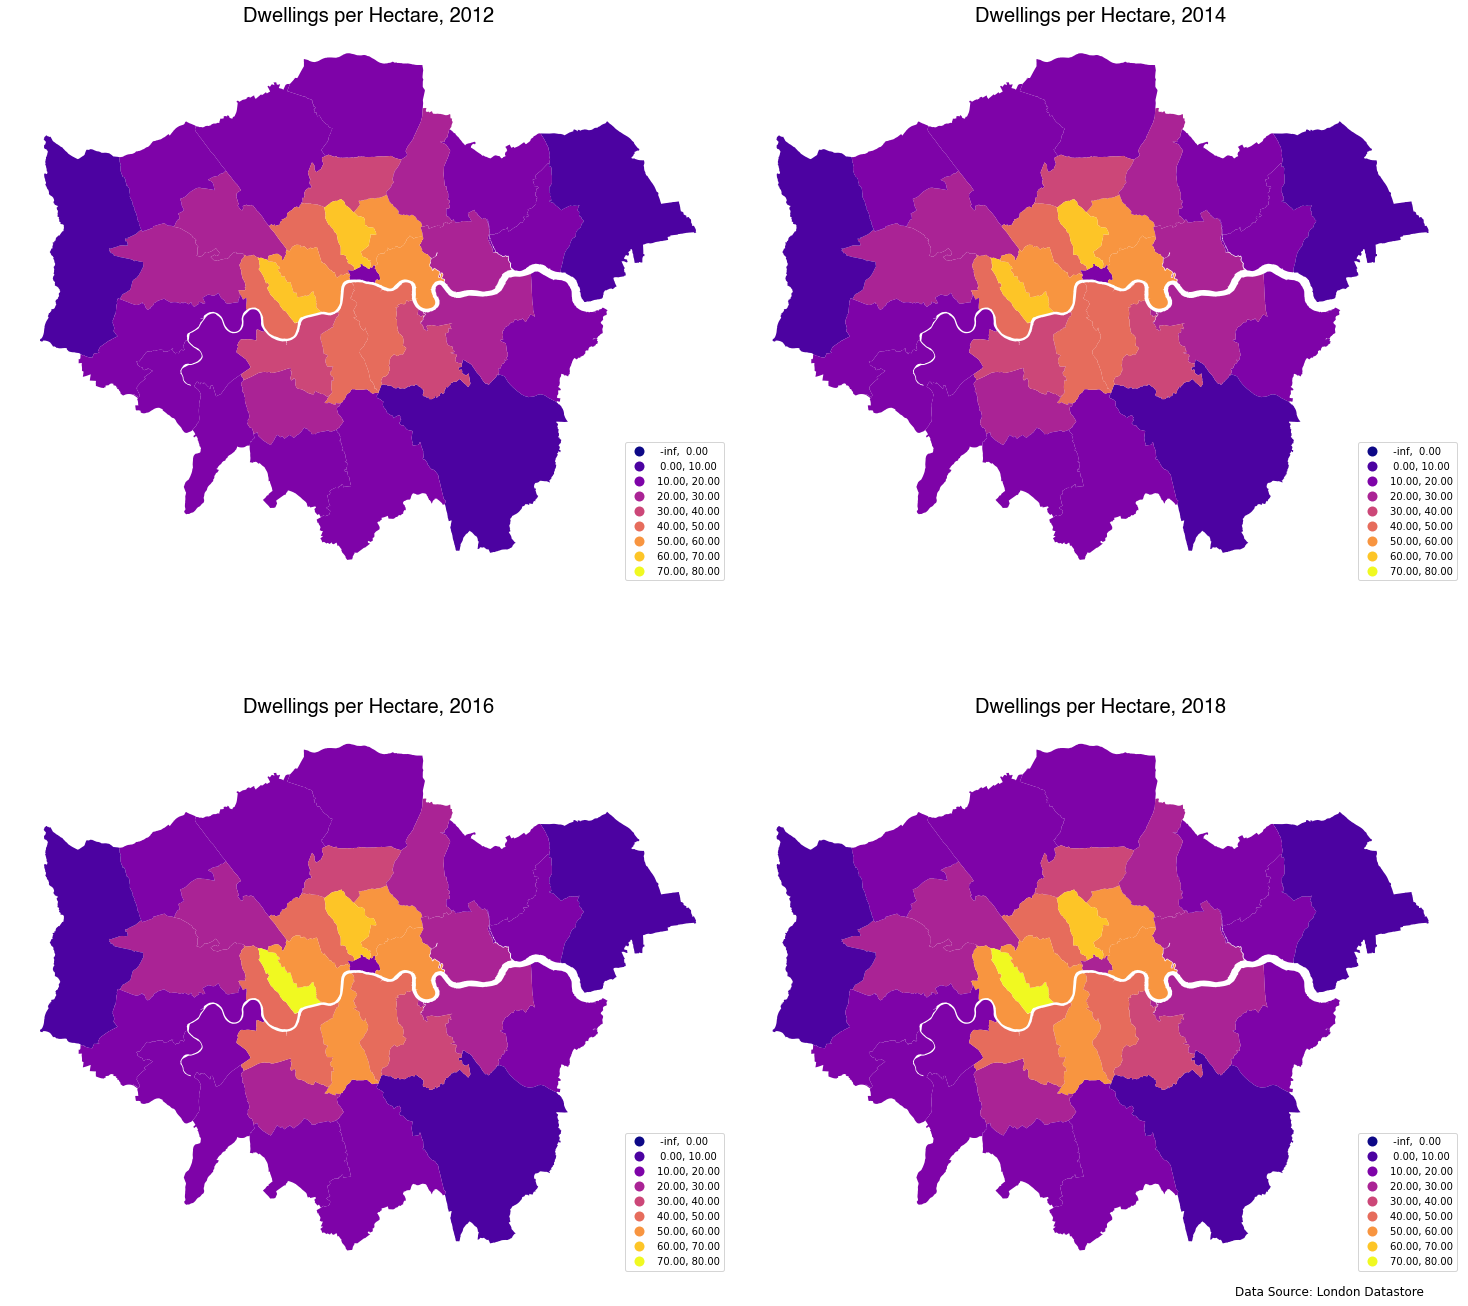

In [453]:
# Comparative maps of dwelling density in London boroughs in 2012 and 2014
# Variables to map
london_dph_density_cols = london_dph_density[['borough', 'dph_2012', 'dph_2014', 
                                              'dph_2016', 'dph_2018', 'geometry']]

# Rename columns for map titles
london_dph_density_cols.columns = ['borough','Dwellings per Hectare, 2012','Dwellings per Hectare, 2014',
                                   'Dwellings per Hectare, 2016','Dwellings per Hectare, 2018', 'geometry']

# Density variables
dph_y = ['Dwellings per Hectare, 2012','Dwellings per Hectare, 2014',
         'Dwellings per Hectare, 2016','Dwellings per Hectare, 2018']

fig, axs = plt.subplots(2, 2, figsize=(20.5, 20.5)) # Produce figure and axis
font_title = {'family':'helvetica','color':'black','size':20} # Title font
axs = axs.flatten()

# Loop over each year
for i, y in enumerate(dph_y):
    london_dph_density_cols.plot(y,
                                 scheme="UserDefined", # Manual classification system
                                 classification_kwds={"bins": [0, 10, 20, 30, 40, 50, 60, 70, 80]}, # Custom bins
                                 legend=True, # Add legend
                                 legend_kwds={"loc": "lower right"}, # Location of legend
                                 cmap='plasma', # Colour palette
                                 ax=axs[i])
    axs[i].set_axis_off() # Delete axes
    axs[i].set_title(y, fontdict=font_title) # Titles
    
plt.tight_layout()

plt.annotate('Data Source: London Datastore', (0,0), (495,-20), fontsize=12, 
             xycoords='axes fraction', textcoords='offset points') # Annotate with data source

plt.show()

#### Interactive Choropleth Mapping
Python has a number of packages for interactive mapping. Here, we will utilise the [folium](https://github.com/python-visualization/folium) package to produce an interactive choropleth map.

In [335]:
# Simple interactive map centred on London
map = folium.Map(location=[51.5033725, -0.1276227], zoom_start=10)

map

In [336]:
# Interactive choropleth map of borough-level dwelling density in Greater London in 2012
choropleth = folium.Choropleth(geo_data=london_dph_density, # Geo data to map
                               data=london_dph_density, # Data to map
                               columns=['borough', 'dph_2012'], # Borough name and density variable
                               key_on='feature.properties.borough', # ID variable
                               bins=[0, 20, 40, 60, 80], # Custom bins
                               fill_color='PuBu', # Colour palette https://colorbrewer2.org/
                               fill_opacity=0.9, # Opacity of polygons
                               line_opacity=0.6, # Opacity of polygon outlines
                               line_color='black', # Colour of polygon outlines
                               legend_name='Dwellings per Hectare, 2012', # Legend title
                               highlight=True).add_to(map) # Highlight

# Add a tooltip to the choropleth geojson
folium.GeoJsonTooltip(['borough', 'dph_2012']).add_to(choropleth.geojson)

folium.LayerControl().add_to(map) # Add layer control

map

#### Dot Density Maps
Dot density maps are another popular thematic mapping technique that show the spatial distribution of points.

In this example, we will be producing a dot density map of completed residential developments in the borough of Enfield. We will be working with the [London Development Database](https://data.london.gov.uk/dataset/planning-permissions-on-the-london-development-database--ldd-), which records planning data from the local authorities of Greater London.

In [337]:
# Load the London Development Database dataset for the borough of Enfield in 2018/2019
enfield_ldd = gpd.read_file("https://github.com/lbuk/UD_Intro_SDSML2022/blob/master/02_visualisation/data/enfield_borough_ldd_2018.geojson?raw=true")

In [338]:
# Print columns
enfield_ldd.columns

Index(['Planning.Authority', 'Borough.Reference', 'Current.permission.status',
       'Permission.Type', 'Decision.Agency', 'Development.Description',
       'Scheme.Name', 'Site.Name.Number', 'Subdivision.of.Building',
       'Primary.Street.Name', 'Secondary.Street.s.', 'Post.Code', 'Ward',
       'Easting', 'Northing', 'Permission.Date', 'Permission.Financial.Year',
       'Date.work.commenced.on.site..Started.Date.', 'Started.Financial.Year',
       'Date.construction.completed..Completed.Date.',
       'Completed.Financial.Year',
       'Date.permission.expires.if.work.not.commenced..Lapsed.Date.',
       'Lapsed.Financial.Year',
       'Residential.Site.Area..Proposed..Hectares..ha.',
       'Non.Res.Site.Area..Proposed..Hectares..ha.',
       'Total.Open.Space..Existing..Hectares..ha.',
       'Total.Open.Space..Proposed..Hectares..ha.',
       'Total.Site.Area..Proposed..Hectares..ha.',
       'Existing.Total.Residential.Units', 'Proposed.Total.Residential.Units',
       'Propo

In [339]:
# Print the CRS
enfield_ldd.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [340]:
# Dataset info
enfield_ldd.info

<bound method DataFrame.info of     Planning.Authority Borough.Reference Current.permission.status  \
0              Enfield      14/02419/FUL                 Completed   
1              Enfield      14/03098/FUL                 Completed   
2              Enfield      14/04651/FUL                 Completed   
3              Enfield      14/04711/FUL                 Completed   
4              Enfield      14/04895/FUL                 Completed   
..                 ...               ...                       ...   
134            Enfield      P13-03830PLA                 Completed   
135            Enfield      P14-02125PLA                 Completed   
136            Enfield      P14-02203PLA                 Completed   
137            Enfield        TP/06/1866                 Completed   
138            Enfield        TP/10/0743                 Completed   

    Permission.Type Decision.Agency  \
0              Full         Borough   
1              Full         Borough   
2         

In [341]:
# Load Enfield borough outline
enfield_borough = gpd.read_file("https://github.com/lbuk/UD_Intro_SDSML2022/blob/master/02_visualisation/data/enfield_borough.geojson?raw=true")

In [342]:
# Print the CRS
enfield_borough.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

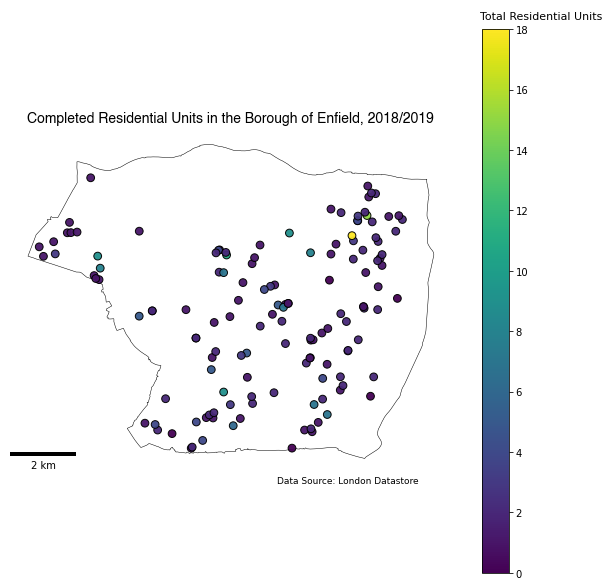

In [426]:
# Dot density map of residential units completed in Enfield borough in 2018/2019
# Plot Enfield borough outline
fig = plt.figure() # Produce figure
ax = enfield_borough.plot(linewidth=0.5, 
                          edgecolor='black', 
                          color='white',
                          figsize=(10, 10))

# Plot residential units completed in Enfield borough in 2018/2019
enfield_ldd.plot(ax=ax,
                 column='Proposed.Total.Residential.Units', # Variable to map
                 markersize=60,
                 alpha=0.95, # Opacity
                 cmap="viridis", # Colour scheme
                 edgecolor='k', # Edge colour
                 legend=True) # Add legend

# Legend
ax.legend(loc=(1.0475, 1.275), # Legend location
          fontsize=13, # Font size
          title_fontsize=11, # Legend title font size
          frameon=False, # Delete legend frame
          title="Total Residential Units") # Legend title

font_title = {'family':'helvetica','color':'black','size':14} # Title font
plt.title('Completed Residential Units in the Borough of Enfield, 2018/2019', fontdict=font_title) # Title

plt.annotate('Data Source: London Datastore', (0,0), (270,-10), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points') # Annotate with data source

ax.set_axis_off() # Delete axes

ax.add_artist(ScaleBar(1, location='lower left')) # Scale bar

plt.show()

#### Proportional Symbol Maps
In proportional symbol maps, the symbols are sized according to a variable.

Utilising the same dataset as the previous example, we will be creating a proportional symbol map of residential units completed in the borough of Enfield in 2018/2019.

<Figure size 432x288 with 0 Axes>

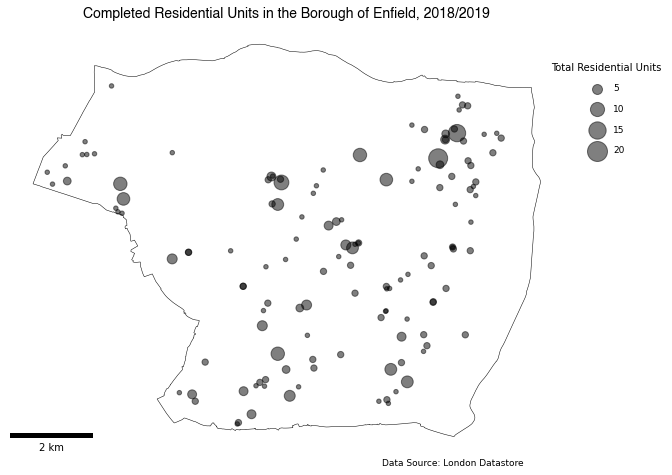

In [427]:
# Proportional symbol map of residential units completed in Enfield borough in 2018/2019
# Visualise Enfield borough outline
fig = plt.figure() # Produce figure
ax = enfield_borough.plot(linewidth=0.5, # Width of outline
                          edgecolor='black', # Colour of outline
                          color='white', # Colour of polygon
                          figsize=(10, 10)) # Figure size

# Set the variable that will be utilised to size the markers
marker_size = enfield_ldd['Proposed.Total.Residential.Units']

# Plot residential units completed in Enfield borough in 2018/2019
enfield_ldd.plot(ax=ax,
                 alpha=0.5, # Opacity
                 color="black", # Colour
                 markersize=marker_size*20, # Set marker size and multiply for clarity
                 edgecolor='k') # Edge colour

# Legend items
ax.scatter([], [], 
           c='black', # Colour
           alpha=0.5, # Opacity
           s=5*20, # Size 
           label='5', # Label
           edgecolor='black') # Edge colour
ax.scatter([], [], 
           c='black', # Colour
           alpha=0.5, # Opacity
           s=10*20, # Size 
           label='10', # Label
           edgecolor='black') # Edge colour
ax.scatter([], [], 
           c='black', # Colour
           alpha=0.5, # Opacity
           s=15*20, # Size 
           label='15', # Label
           edgecolor='black') # Edge colour
ax.scatter([], [],
           c='black', # Colour
           alpha=0.5, # Opacity
           s=20*20, # Size 
           label='20', # Label
           edgecolor='black') # Edge colour

# Produce legend
ax.legend(scatterpoints=1, # Legend
          labelspacing=1.3, # Spacing between legends
          fontsize=9, # Font size
          title="Total Residential Units", # Legend title
          bbox_to_anchor=(0.96,0.93), # Bounding box to anchor by
          title_fontsize=10, # Legend title font size
          frameon=False) # Delete legend frame

font_title = {'family':'helvetica','color':'black','size':14} # Title font
plt.title('Completed Residential Units in the Borough of Enfield, 2018/2019', fontdict=font_title) # Title

plt.annotate('Data Source: London Datastore', (0,0), (375,-10), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points') # Annotate with data source

ax.set_axis_off() # Delete axes

ax.add_artist(ScaleBar(1, location='lower left')) # Scale bar

plt.show()

#### Dasymetric Maps
A form of thematic mapping technique, dasymetric maps visualise geographic data and ancillary information at granular scales.

In this example, we'll be producing a dasymetric map of building density in Romford utilising data from [Emu Analytics](https://www.emu-analytics.com/products/datapacks.php).

In [2]:
# Load dataset of the building heights in Romford from Emu Analytics: https://www.emu-analytics.com/products/datapacksq=number%20and%20de
romford_building_density = gpd.read_file("https://github.com/lbuk/UD_Intro_SDSML2022/blob/master/02_visualisation/data/romford_building_density.geojson?raw=true")

In [3]:
# Dataset info
romford_building_density.info

<bound method DataFrame.info of       OBJECTID                                ID  MEAN_mean  MIN_min  \
0     11754304  0D4F713B99D327B3E050A00A568A259B   6.214594      0.0   
1     11754305  0D4F713B99D427B3E050A00A568A259B   6.417239      0.0   
2     11754306  0D4F713B99D527B3E050A00A568A259B   5.133375      0.0   
3     11754307  0D4F713B99D627B3E050A00A568A259B   5.558517      0.0   
4     11754308  0D4F713B99D727B3E050A00A568A259B   5.385870      0.0   
...        ...                               ...        ...      ...   
4021  11995429  0D4F713F47BA27B3E050A00A568A259B   6.311966      0.0   
4022  11995430  0D4F713F47BB27B3E050A00A568A259B   5.360670      0.0   
4023  11995431  0D4F713F47BC27B3E050A00A568A259B   6.407824      0.0   
4024  11995432  0D4F713F47BD27B3E050A00A568A259B   6.672005      0.0   
4025  11995433  0D4F713F47BE27B3E050A00A568A259B   5.498563      0.0   

       MAX_max  Shape_Leng  Shape_Area    BNG_Area  \
0     9.352001  101.142941  562.533633  217.61252

In [4]:
# Print CRS
romford_building_density.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<Figure size 432x288 with 0 Axes>

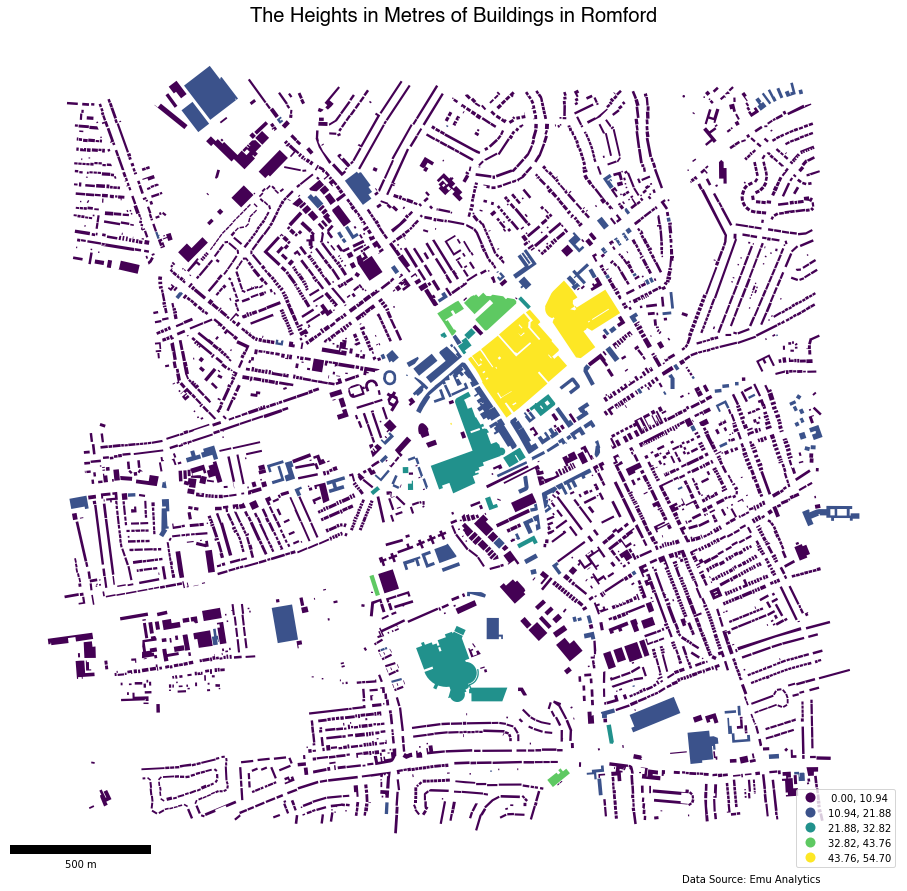

In [5]:
# Dasymetric map of Romford building heights in metres
fig = plt.figure() # Produce figure
ax = romford_building_density.plot(column="MAX_max", # Variable to map
                                   figsize=(16, 16), # Map size
                                   scheme="EqualInterval", # Classification system
                                   cmap="viridis", # Colour scheme
                                   legend=True, # Add legend
                                   legend_kwds={"loc": "lower right"}) # Location of legend

font_title = {'family':'helvetica','color':'black','size':20} # Title font
plt.title('The Heights in Metres of Buildings in Romford', fontdict=font_title) # Title

plt.annotate('Data Source: Emu Analytics', (0,0), (675,-10), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points') # Annotate with data source

ax.set_axis_off() # Delete axes of map

ax.add_artist(ScaleBar(1, location='lower left')) # Scale bar

plt.show()

In [6]:
# Calculate area of Sutton buildings in metres squared
romford_building_density.area

0       217.665069
1        94.461492
2       103.792917
3        84.309275
4        99.933201
           ...    
4021    144.209731
4022    346.823436
4023    342.010685
4024    196.132593
4025    127.555794
Length: 4026, dtype: float64

In [7]:
# New column containing area of Romford buildings in hectares
romford_building_density['area_hectares'] = romford_building_density.area / 10000

<Figure size 432x288 with 0 Axes>

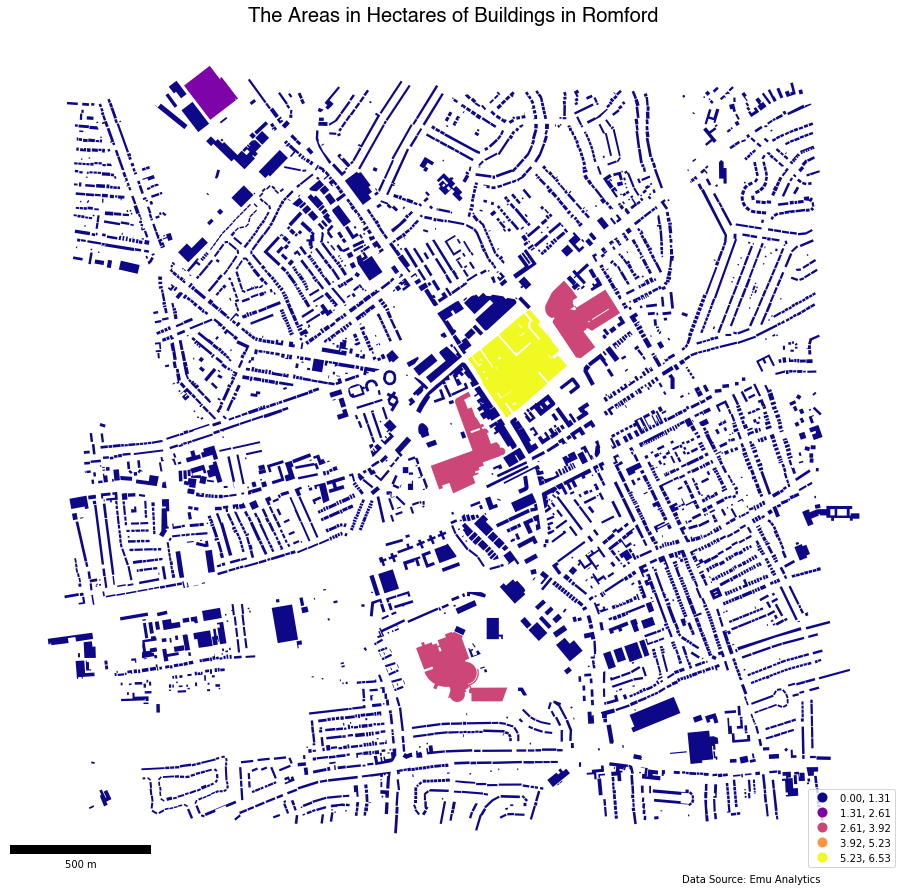

In [8]:
# Dasymetric map of Romford building area in hectares
fig = plt.figure() # Produce figure
ax = romford_building_density.plot(column="area_hectares", # Variable to map
                                   figsize=(16, 16), # Map size
                                   scheme="EqualInterval", # Classification system
                                   cmap="plasma", # Colour scheme
                                   legend=True, # Add legend
                                   legend_kwds={"loc": "lower right"}) # Location of legend

font_title = {'family':'helvetica','color':'black','size':20} # Title font
plt.title('The Areas in Hectares of Buildings in Romford', fontdict=font_title) # Title

plt.annotate('Data Source: Emu Analytics', (0,0), (675,-10), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points') # Annotate with data source

ax.set_axis_off() # Delete axes of map

ax.add_artist(ScaleBar(1, location='lower left')) # Scale bar

plt.show()

/Users/liambolton/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


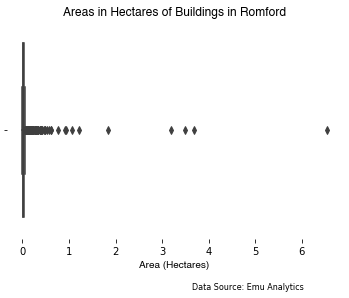

In [11]:
# Boxplot of building area in Romford
fig = plt.figure() # Produce figure
ax = sns.boxplot(romford_building_density['area_hectares']) # Produce axis and box plot

font_title = {'family':'helvetica','color':'black','size':12}
plt.title('Areas in Hectares of Buildings in Romford', fontdict=font_title)

font_axes = {'family':'helvetica','color':'black','size':10}
plt.xlabel('Area (Hectares)', fontdict=font_axes)

plt.annotate('Data Source: Emu Analytics', (0,0), (185,-50), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points') # Annotate with data source

ax.set(frame_on=False) # Delete frame

plt.show()

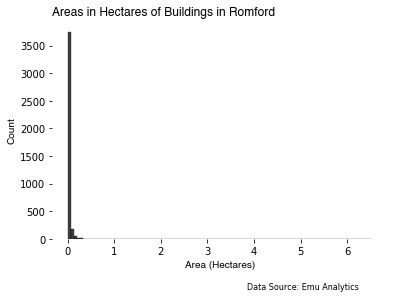

In [13]:
# Histogram of building area in hectares in Romford
fig = plt.figure() # Produce figure
ax = sns.histplot(romford_building_density["area_hectares"], bins=100, color='black') # Produce axis and histogram

font_axes = {'family':'helvetica','color':'black','size':10} # Axes font
plt.xlabel('Area (Hectares)',  fontdict = font_axes) # x-axis label
plt.ylabel('Count',  fontdict = font_axes) # y-axis label

font_title = {'family':'helvetica','color':'black','size':12} # Title font
plt.title('Areas in Hectares of Buildings in Romford', fontdict = font_title, loc = "left") # Chart title

plt.annotate('Data Source: Emu Analytics', (0,0), (195,-50), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points') # Annotate with data source

ax.set(frame_on=False) # Delete frame

plt.show()

### Exercises
1. Produce a KDE chart with the London density dataset illustrating dwellings per hectare in 2018 in Greater London.
2. Produce a choropleth map using the London density dataset, the dwellings per hectare 2018 variable and the equal intervals classification system.
3. Produce comparative choropleth maps for dwellings per hectare in 2012 and 2018 in the London boroughs.
4. Produce an interactive choropleth map of dwellings per hectare in 2018 in the London boroughs utilising Folium.
5. Utilising the Enfield dataset, produce a new column for units per hectare and then visualise this data with a proportional symbol map.

### Resources
- [The Functional Art](http://www.thefunctionalart.com/)
- [Visualising Data](https://www.visualisingdata.com/)
- [Cartonerd blog](http://cartonerd.blogspot.com/)
- [Cartographer's Toolkit blog](http://blog.gretchenpeterson.com/)
- [Data Visualization in Python](https://www.amazon.co.uk/Data-Visualization-Python-Daniel-Nelson/dp/B08TZ9LWWX)
- [Introduction to Python for Geographic Data Analysis](https://pythongis.org/#)
- [Geographic Data Science with Python](https://geographicdata.science/book/intro.html)
- [Geoprocessing with Python](https://livebook.manning.com/book/geoprocessing-with-python)
- [Python Foundation for Spatial Analysis](https://courses.spatialthoughts.com/python-foundation.html)